In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('german.csv', sep = ';')
data.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


## Mapping Values

In [5]:
X = data.drop('Creditability', axis = 1)

y = data.Creditability

In [6]:
features = X.columns
features

Index(['Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

+ Account Balance

<AxesSubplot:xlabel='Account_Balance', ylabel='Count'>

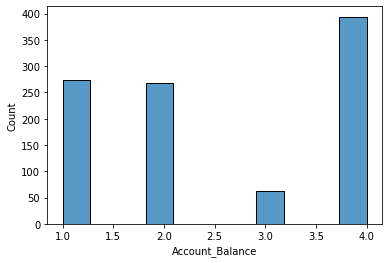

In [19]:
sns.histplot(X['Account_Balance'])

In [7]:
X['Account_Balance'].value_counts()

4    394
1    274
2    269
3     63
Name: Account_Balance, dtype: int64

In [8]:
# Transform to percentage
X['Account_Balance'].value_counts() / len(X) * 100

4    39.4
1    27.4
2    26.9
3     6.3
Name: Account_Balance, dtype: float64

In [57]:
'''
    Map Values: Account Balance
    
    1 > No Account
    2 > None
    3 > Below 200 DM
    4 > 200 DM or Above
'''

new_X = X.copy()

new_X = new_X.replace({'Account_Balance':{
    1 : 'No Account',
    2 : 'None',
    3 : 'Below 200 DM',
    4 : '200 DM or Above'
}})

In [58]:
new_X.head(10)

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,No Account,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,No Account,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,None,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,No Account,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,No Account,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
5,No Account,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,2,1,2
6,No Account,8,4,0,3398,1,4,1,3,1,4,1,39,3,2,2,2,1,1,2
7,No Account,6,4,0,1361,1,2,2,3,1,4,1,40,3,2,1,2,2,1,2
8,200 DM or Above,18,4,3,1098,1,1,4,2,1,4,3,65,3,2,2,1,1,1,1
9,None,24,2,3,3758,3,1,1,2,1,4,4,23,3,1,1,1,1,1,1


In [14]:
# Much more informative this way
new_X['Account_Balance'].value_counts() / len(new_X) * 100

200 DM or Above    39.4
No Account         27.4
None               26.9
Below 200 DM        6.3
Name: Account_Balance, dtype: float64

+ Payment_Status_of_Previous_Credit

In [24]:
new_X['Payment_Status_of_Previous_Credit'].value_counts()

2    530
4    293
3     88
1     49
0     40
Name: Payment_Status_of_Previous_Credit, dtype: int64

In [56]:
'''
    Map Values: Payment_Status_of_Previous_Credit
    
    0 > Delayed
    1 > Other Credits
    2 > Paid Up
    3 > No Problem with Current Credits
    4 > Previous Credits Paid

'''

new_X = new_X.replace({'Payment_Status_of_Previous_Credit':{
    0 : 'Delayed',
    1 : 'Other Credits',
    2 : 'Paid Up',
    3 : 'No Problem with Current Credits',
    4 : 'Previous Credits Paid'
}})

new_X.head()

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,No Account,18,Previous Credits Paid,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,No Account,9,Previous Credits Paid,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,None,12,Paid Up,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,No Account,12,Previous Credits Paid,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,No Account,12,Previous Credits Paid,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


In [27]:
new_X['Payment_Status_of_Previous_Credit'].value_counts()

Paid Up                            530
Previous Credits Paid              293
No Problem with Current Credits     88
Other Credits                       49
Delayed                             40
Name: Payment_Status_of_Previous_Credit, dtype: int64

Custom function to do the heavy lifting

In [48]:
# Key: Value pair of items to map
values_map = {
    'Value_Savings_Stocks': {
        1 : 'None',
        2 : 'Below 100 DM',
        3 : '[100, 500)',
        4 : '[500, 1000)',
        5 : 'Above 1000'
    },
    'Length_of_current_employment' : {
        1 : 'Unemployed', 
        2 : '<1 Year',
        3 : '[1, 4)',
        4 : '[4, 7)',
        5 : 'Above 7'
    },
    'Instalment_per_cent' : {
        1 : 'Above 35%', 
        2 : '(25%, 35%)',
        3 : '[20%, 25%)',
        4 : 'Below 20%'
    }
}

In [ ]:
sub_df = new_X[]

In [49]:
values_map['Instalment_per_cent'].items()

dict_items([(1, 'Above 35%'), (2, '(25%, 35%)'), (3, '[20%, 25%)'), (4, 'Below 20%')])

In [50]:
values_map['Instalment_per_cent'].keys()

dict_keys([1, 2, 3, 4])

In [51]:
values_map['Instalment_per_cent'].values()

dict_values(['Above 35%', '(25%, 35%)', '[20%, 25%)', 'Below 20%'])

In [52]:
def trial_one(df, col):
#     df2 = df.copy()
#     df2 = df2[col]
    
    the_keys = values_map[col].keys()
    the_values = values_map[col].values()
    
    items = values_map[col].items()
    
    return the_keys, the_values, items

In [53]:
trial_one(new_X, 'Instalment_per_cent')

(dict_keys([1, 2, 3, 4]),
 dict_values(['Above 35%', '(25%, 35%)', '[20%, 25%)', 'Below 20%']),
 dict_items([(1, 'Above 35%'), (2, '(25%, 35%)'), (3, '[20%, 25%)'), (4, 'Below 20%')]))

In [54]:
cols = ['Instalment_per_cent']

In [75]:
def map_values(df, values_map, list):
    new_df = df.copy()
    for col in list:
        for k, v in values_map[col].items():
            print(f'{k} > {v}')
            new_df = new_df.replace({col : {k : v}})
        
    return new_df.head(10)

In [76]:
map_values(new_X, values_map, cols)

1 > Above 35%
2 > (25%, 35%)
3 > [20%, 25%)
4 > Below 20%


,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,No Account,18,4,2,1049,1,2,Below 20%,2,1,4,2,21,3,1,1,3,1,1,1
1,No Account,9,4,0,2799,1,3,"(25%, 35%)",3,1,2,1,36,3,1,2,3,2,1,1
2,None,12,2,9,841,2,4,"(25%, 35%)",2,1,4,1,23,3,1,1,2,1,1,1
3,No Account,12,4,0,2122,1,3,"[20%, 25%)",3,1,2,1,39,3,1,2,2,2,1,2
4,No Account,12,4,0,2171,1,3,Below 20%,3,1,4,2,38,1,2,2,2,1,1,2
5,No Account,10,4,0,2241,1,2,Above 35%,3,1,3,1,48,3,1,2,2,2,1,2
6,No Account,8,4,0,3398,1,4,Above 35%,3,1,4,1,39,3,2,2,2,1,1,2
7,No Account,6,4,0,1361,1,2,"(25%, 35%)",3,1,4,1,40,3,2,1,2,2,1,2
8,200 DM or Above,18,4,3,1098,1,1,Below 20%,2,1,4,3,65,3,2,2,1,1,1,1
9,None,24,2,3,3758,3,1,Above 35%,2,1,4,4,23,3,1,1,1,1,1,1


In [ ]:
sub_df = 

In [74]:
new_X['Instalment_per_cent'].value_counts()

4    476
2    231
3    157
1    136
Name: Instalment_per_cent, dtype: int64